<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
</head>
<body>
    <div style="text-align:center; border:solid; padding:15px"> <h1><strong>Rapport ParcourSup 2022/2023</strong></h1> </div>

<h2 style="padding-top:40px"><strong>Introduction :</strong></h2>
    <p> A Compléter </p>

<div style="padding-top:40px; padding-bottom:40px">
    <h2> <strong>Sommaire :</strong></h2>
    <ol>
        <li><a href="#Fonctions"><strong>Fonctions</strong></a></li>
        <ul>
            <li><a href=#Fonction_principale>Fonction principale</a></li>
            <li><a href=#Fonctions_secondaires>Fonctions secondaires</a></li>
            <li><a href=#Type_graph>Type de graph</a></li>
        </ul>
        <li><a href="#Données"><strong>Données</strong></a></li>
        <ul>
            <li><a href=#Candidature>Candidature</a></li>
        </ul>
        <li><a href="#Classement"><strong>Classement</strong></a></li>
        <ul>
            <li><a href=#Récup_données>Récupération des données</a></li>
            <li><a href=#Score>Calcul des scores</a></li>
            <li><a href=#Attribution>Attribution du classement</a></li>
            <li><a href=#Affichage>Affichage du classement</a></li>
        </ul>
        <li><a href="#Analyse_classement"><strong>Analyse du classement</strong></a></li>
        <ul>
            <li><a href=#></a></li>
        </ul>
    </ol>
</div>

In [ ]:
!pip install pandas --upgrade
!pip install matplotlib --upgrade
!pip install openpyxl --upgrade
!pip install pyarrow --upgrade

In [1]:
import pandas as pd
from math import *
from matplotlib.pyplot import *
from matplotlib import *

In [3]:
df = pd.read_excel("INFO_Anonyme.xlsx")
categories_a_drop_car_vides = [col for col in df if df[col].isna().all()]
df = df.drop(columns = categories_a_drop_car_vides)

<div id="Fonctions", style="padding-top:40px">
    <h2><strong>Fonctions</strong></h2>
    <ul>
        <li><a href=#Fonction_principale>Fonction principale</a></li>
        <li><a href=#Fonctions_secondaires>Fonctions secondaires</a></li>
        <li><a href=#Type_graph>Type de graph</a></li>
    </ul>
    <p>Dans le but de nous faciliter la tâche, nous avons dans un premier temps créer des fonctions qui nous permettraient de récupérer les données des candidats. Nous allons donc vous présenter les différentes fonctions qui nous permetterons d'analyser les données des candidats</p>
</div>

<div id="Fonction_principale", style="padding-top:30px">
    <h3><strong>Fonction principale</strong></h3>
    <p>
        Notre fonction principale est la fonction <code>graph</code> qui nous permet de récupérer les données des candidats et de les afficher sous forme de graphique. <br>
        Elle possède plusieurs paramètres qui nous permet d'afficher divers graphiques selon certaines conditions :
    </p>
    <ul>
        <li>catégorie : Choix de la catégorie que l'on souhaite récupérer les données.</li>
        <li>en_fonction_de : Filtre la DataFrame afin de pouvoir récupérer les données de la catégorie que l'on souhaite.</li>
        <li>type_graph : Permet de choisir le type de graph que l'on souhaite affiché.</li>
        <li>minimum : Les valeurs inférieurs à "minimum" seront stockés dans une catégorie "Autres".</li>
        <li>classement : Filtre la DataFrame afin de récuperer les candidats que l'on souhaite analysés les données.</li>
    </ul>
    
</div>

In [32]:
# Fonction qui permet d'afficher un graphe d'une catégorie avec conditions
# catégorie : à prendre sur excel
# minimum : affiche tout les clés qui ont + que le minimum d'étudiant, et affiche ce qui ont - du minimum dans une catégorie "autres"
# Exemple d'utilisation :
# if(graph("Langue vivante B scolarité - Libellé 2022/2023")):show()
def graph(categorie, en_fonction_de = None, type_graph = 'bar', minimum = 20, classement = None, df = df):

    # Si la catégorie est des Notes, faire un graphique de densité plutôt
    if (categorie[:7] == 'Moyenne'): type_graph = 'densite'

    if en_fonction_de != None:
        if len(en_fonction_de) >= 3:
            for i in range (len(en_fonction_de)-1, 1, -1):
                # On aurait aussi pu faire de la récursivité jusqu'à ce qu'il n'y ait plus qu'une seule dimension à afficher dans le graphique
                graph(categorie = categorie, type_graph = type_graph, minimum = minimum,
                      classement = classement, df = df, en_fonction_de = [en_fonction_de[0], en_fonction_de[i]])
                show()
                en_fonction_de.pop(i)
        if len(en_fonction_de) == 2:
            df = df.loc[df[en_fonction_de[0]] == en_fonction_de[1]]
            print("\n" + en_fonction_de[0] + " : " + en_fonction_de[1] + "\n")
        else: return False

    if classement != None:
        # On filtre afin d'observer les étudiants dans le "classement"
        df = df.loc[df["ID"].isin(classement)]
        
    if (type_graph == 'densite'): graph_densite(categorie, df)

    # Convertir toutes les valeurs en chaînes pour uniformiser
    str_values = df[categorie].astype(str)
    dic = str_values.value_counts()
    X_labels = dic.index.tolist()
    Y = dic.values
    
    if categorie[:7] == "Commune":
        dep = departement(df)
        X_labels = dep[0]
        Y = dep[1]

    # Mise à jour de X et Y avec les fonctions autres_X et autres_Y
    X_labels = autres_X(X_labels, Y, minimum)
    Y = autres_Y(Y, minimum)
        
    # Supprimer les nan si c'est la barre la plus haute
    if (X_labels[0] == 'nan') and (Y[0] >= max(Y)):
        X_labels = X_labels[1:]
        Y = Y[1:]
    
    # Remplacer 'nan' par 'Non renseigné' dans X_labels restants
    X_labels = ['Non renseigné' if label == 'nan' else label for label in X_labels]

    if (type_graph == 'bar'): return graph_bar(categorie, minimum, Y, X_labels, dic)
    if (type_graph == 'circulaire'): return graph_circulaire(Y, X_labels, dic, categorie)

<div id="Fonctions_secondaires", style="padding-top:40px">
    <h3>Fonctions secondaires</h3>
    <p>Nous possédons quatre fonctions secondaires qui permettent le bon fonctionnement de notre fonction principale :</p>
    <ul>
        <li>Les fonctions <code>autres_X</code> et <code>autres_Y</code> qui permettent de stocker les données inférieur à "minimum" dans une catégorie appelée "autres"</li>
        <li>La fonction <code>departement</code> qui récupère toutes les communes afin de les regroupés par département</li>
        <li>La fonction <code>classement</code> qui récupère les positions des candidats dans le classement (sera introduite plus tard, lorsque nous aurons le classement)</li>
    </ul>
</div>

<p>La fonction <code>autres_X</code> regroupe les labels ayant des candidats inférieur à "minimum" dans une catégorie appelée "Autres". Pour cela, la fonction vérifie si le nombre d'étudiant dans un label est supérieur au minimum.</p>

In [6]:
# Fonction qui renvoie une liste avec +n étudiant et le reste dans 'autres' pour X
def autres_X(X, Y, minimum):
    tab = []
    autre_inclus = False
    for i in range(len(X)):
        if (Y[i] >= minimum): tab.append(X[i])
        else: autre_inclus = True
    if autre_inclus: tab.append('Autres')
    return tab

<p style="padding-top:30px">La fonction <code>autres_Y</code> vérifie le nombre de candidat dans chaque label afin de regrouper le nombre de candidat dans la catégorie "Autres" lorsque celui-ci est inférieur à "minimum."</p>

In [7]:
# Fonction qui renvoie une liste avec +n étudiant et le reste dans 'autres' pour Y
def autres_Y(Y, minimum):
    tab = []
    autre = 0
    for valeur in Y:
        if (valeur >= minimum): tab.append(valeur)
        else: autre += valeur
    if (autre > 0): tab.append(autre)
    return tab

<p style="padding-top:30px">La fonction <code>departement</code> récupère les communes de tout les candidats afin de les regroupés par département. Pour cela, la fonction récupère les 2 premiers chiffres des communes de chaque étudiant et les ajoutes dans un tableau s'il n'est pas encore dedans. Elle calcule ensuite de le nombre d'étudiants dans chaque département.</p>

In [8]:
def departement(df):
    dep_tab = [] # Tableau avec les différents départements
    dep_cpt = [] # Tableau avec le nombre d'étudiants dans chaque départements
    
    for i in df["Commune Etablissement origine - CodePostal 2022/2023"]:
        if len(str(i)) == 5:
           if str(i)[:2] not in dep_tab:
               dep_tab.append(str(i)[:2])
        
    for i in dep_tab :
        cpt = 0
        for j in df["Commune Etablissement origine - CodePostal 2021/2022"]:
            if (str(i) == str(j)[:2]): cpt += 1
        dep_cpt.append(cpt)
        
    return [dep_tab, dep_cpt]

<div id="Type_graph", style="padding-top:40px">
    <h3>Type de graph</h3>
</div>

<p>Le 1er graphique que l'on peut afficher est un graphique en bâtons, grâce à la fonction <code>graph_bar</code>.</br>
    Cette fonction appelle récursivement graph (et donc elle-même) afin d'ajuster le minimum pour que la barre "Autres" ne soit pas trop importante (donc si il y a trop peu de valeurs affichées, elle va en regrouper moins dans "Autres")</p>

In [9]:
# Fonction qui affiche spécifiquement un graphique en bâtons à partir de graph()
def graph_bar(categorie, minimum, Y, X_labels, dic):
    # Si 'Autre' est l'unique barre ou au moins 2 fois plus grande que la plus grande barre, refaire le graphique avec un minimum 2 fois plus petit
    if ('Autre' in X_labels and minimum <= 20 and len(X_labels) < 25 and (len(X_labels) == 1 or Y[-1] >= 2 * max(Y[:-1]))):
        if (minimum > 1): return graph(categorie, type_graph = 'bar', minimum = minimum // 2)
        else:
            print("Minimum trop petit, graphique de", categorie, "non généré.")
            return False

    # Afficher la série sans la dernière ligne d'information
    print(dic.to_string(max_rows = 15))
        
    # Ajuster la taille du graphique en fonction du nombre de barres (1 à 2 fois la largeur standard)
    if len(X_labels) >= 20:
        largeur = min(6.4 * (1 + (len(X_labels) - 20) / 10), 12.8)
        figure(figsize = (largeur, 4.8))
    
    X = range(len(X_labels)) # Utiliser range(len(X_labels)) pour l'axe des X
    gca().yaxis.set_major_locator(MaxNLocator(integer=True)) # Ajuster les graduations de l'axe Y pour n'avoir que des nombres entiers

    # Mets des jolies couleurs et Autre en noir
    nbr_couleurs = len(Y) - 1 if 'Autre' in X_labels else len(Y)
    cmap = colormaps['hsv'].resampled(nbr_couleurs)
    colors = [cmap(i) for i in range(nbr_couleurs)]
    if ('Autre' in X_labels): colors.append('black')    
        
    bar(X, Y, color = colors)
    ylabel(categorie.replace('Libellé en', 'Libellé en\n'))
    xticks(ticks = X, labels = X_labels, rotation =- 45, ha = 'left')
    return True

Type Formation - Libellé  2022/2023
Terminale                                             3022
Licence                                                321
nan                                                    239
BUT                                                    145
Formations des écoles d'ingénieurs                     110
BTS - BTSA - BTSM                                       69
CPGE                                                    58
                                                      ... 
Master                                                   7
Première                                                 6
Mentions complémentaires                                 3
Licence professionnelle                                  2
DEUST                                                    2
Formations d'art, de design et du spectacle vivant       2
Etudes de santé                                          2


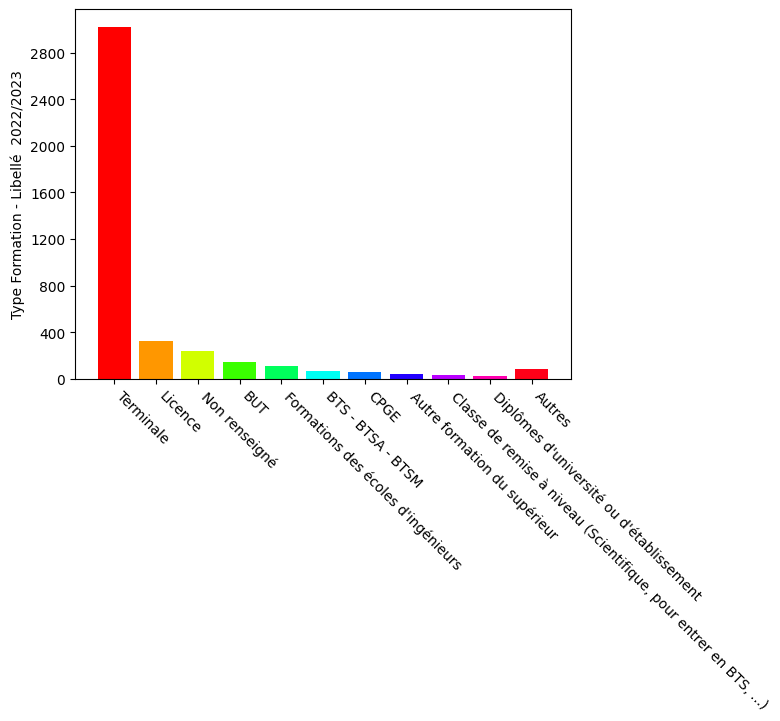

In [12]:
if graph('Type Formation - Libellé  2022/2023'): show()

<p style="padding-top:30px">On peut également afficher des graphiques "en camembert" avec <code>graph_circulaire</code>.</p>

In [10]:
def graph_circulaire(Y, X_labels, dic, categorie):
    print(dic.to_string(max_rows = 15))
    fig, ax = subplots()
    ax.pie(Y, labels = X_labels, autopct = '%1.1f%%')
    ylabel(categorie.replace('Libellé en', 'Libellé en\n'), labelpad = 200)
    return True

Sexe
Masculin    3533
Féminin      611


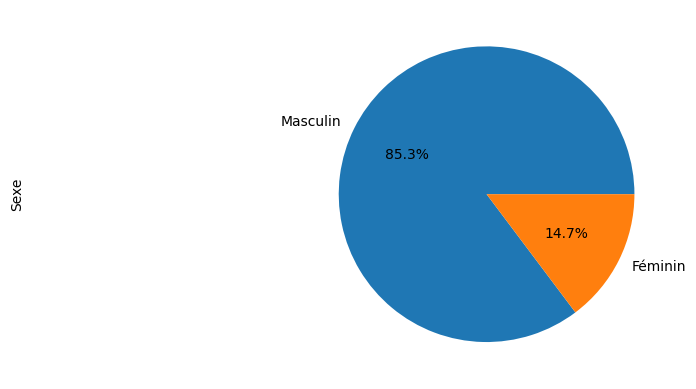

In [13]:
if graph("Sexe", type_graph='circulaire'): show()

<p style="padding-top:30px">Le dernier type de graphiques que nous avons est un histogramme de densité. La fonction <code>graph_densité</code> affiche un histogramme avec un nombre arbitraire de barres, et affiche la moyenne des valeurs. Elle permet notamment d'afficher des notes et de comparer les notes entre 2 groupes si on l'appelle 2 fois avec des groupes différents.</p>

In [11]:
# Histogramme de densité, utile notamment pour les notes qui sont des float entre 0 et 20
def graph_densite(categorie, df):
    notes = pd.to_numeric(df[categorie], errors = 'coerce').dropna()
    hist(notes, bins = 40, density = True, alpha = 0.6, color = 'g')
    moyenne = notes.mean()
    axvline(moyenne, color = 'blue', linestyle = 'dashed', linewidth = 1)
    text(moyenne, ylim()[1], f'Moyenne: {moyenne:.2f}', ha = 'right', va = 'top', color = 'blue')
    title(f"Densité de {categorie}")
    ylabel("Densité")
    xlabel("Valeurs")
    return True

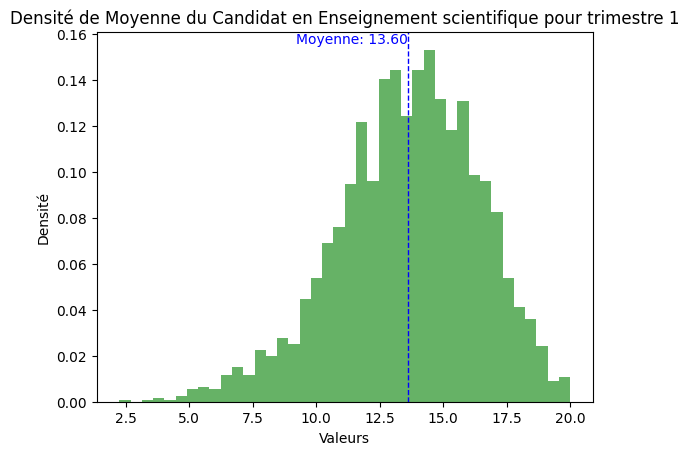

In [14]:
graph('Moyenne du Candidat en Enseignement scientifique pour trimestre 1')

<div id="Données", style="padding-top:40px">
    <h2><strong>Données</strong></h2>
    <ul>
        <li><a href=#Candidature>Candidature</a></li>
        <li><a href=#></a></li>
        <li><a href=#></a></li>
        <li><a href=#></a></li>
    </ul>
    <p>Présentation de nos données</p>
</div>


<div id="Candidature", style="padding-top:30px">
    <h3>Candidature</h3>
</div>

Vœu confirmé - Libellé
Validée        3779
Non validée     365


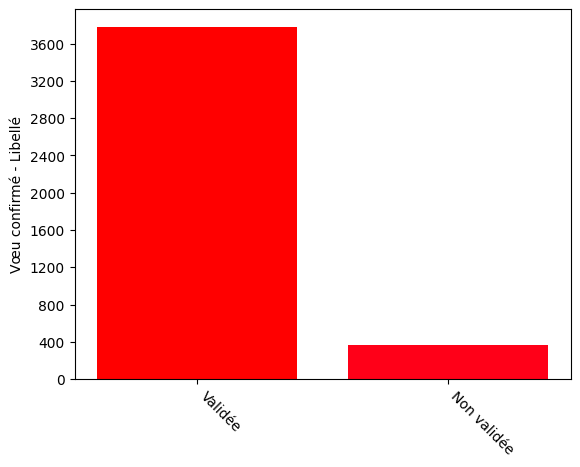

In [15]:
if graph("Vœu confirmé - Libellé"): show()

Sexe
Masculin    3533
Féminin      611


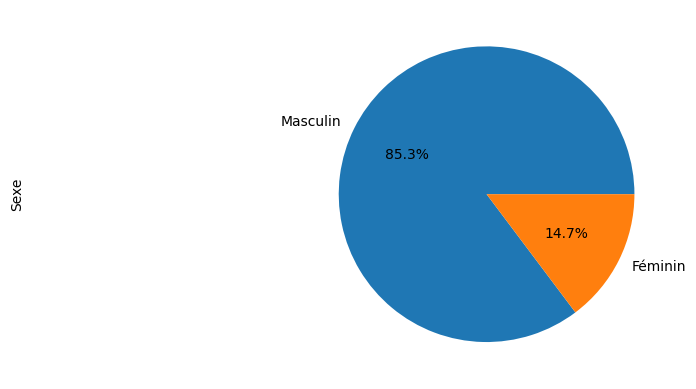


Sexe : Masculin

Candidat boursier - Libellé
Non boursier                            2220
Boursier de l'enseignement scolaire      915
Boursier de l'enseignement supérieur     398


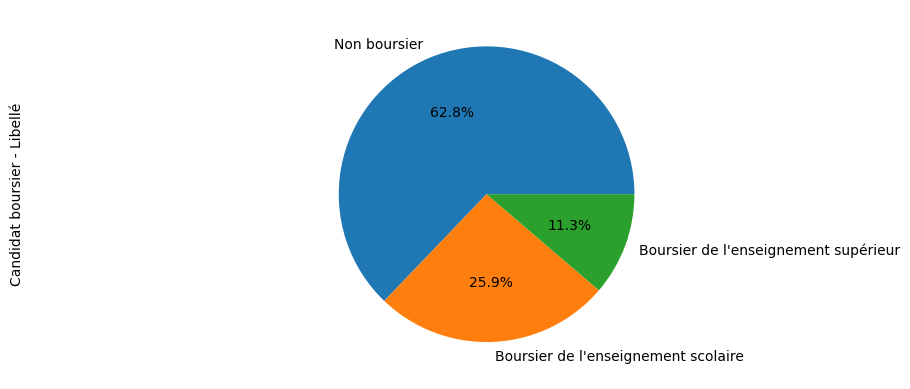


Sexe : Féminin

Candidat boursier - Libellé
Non boursier                            350
Boursier de l'enseignement scolaire     177
Boursier de l'enseignement supérieur     84


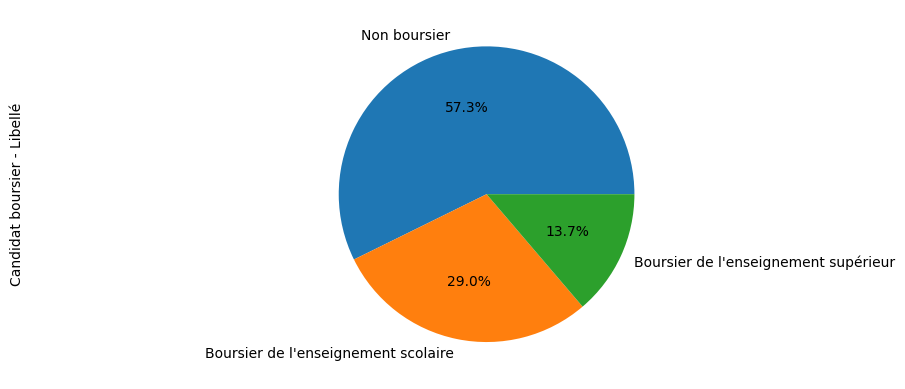

In [16]:
if (graph("Sexe", type_graph = "circulaire")): show()
if (graph("Candidat boursier - Libellé", ["Sexe", "Féminin", "Masculin"], type_graph = "circulaire")): show()

<p>On observe que le pourcentage de femmes boursières est légèrement plus élevé que celui des hommes</p>

Série de classe - Libellé 2022/2023
Série Générale                                                         1951
nan                                                                    1062
Sciences et Technologies de l'Industrie et du Développement Durable     743
Sciences et Technologies du Management et de la Gestion                 222
Professionnelle                                                          68
Formation/Mention complémentaire                                         29
Scientifique                                                             14
                                                                       ... 
Economique et social                                                      4
Classe Passerelle pour l'entrée en BTS Service                            3
Technologique                                                             2
Préparation au Bac Européen                                               1
Brevet des Métiers d'Arts                           

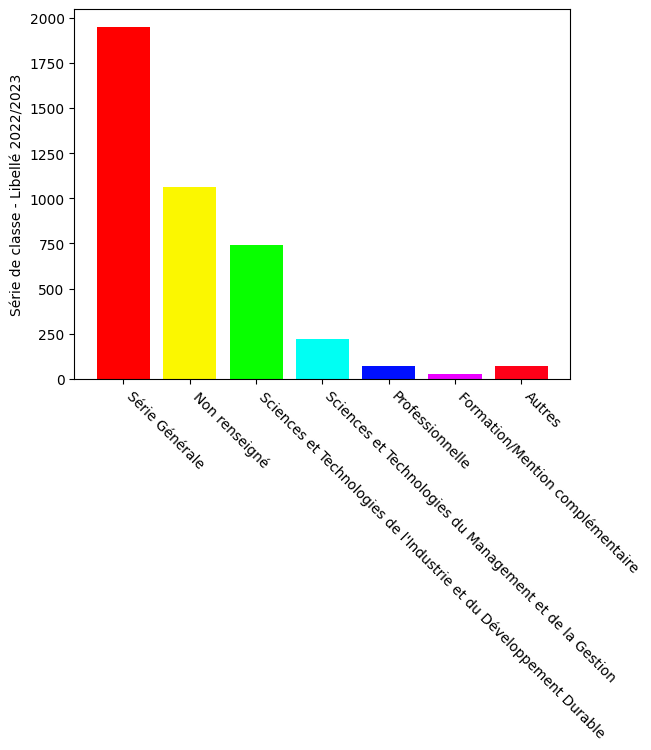

In [17]:
if (graph("Série de classe - Libellé 2022/2023")): show()

<div id="Classement", style="padding-top:40px">
    <h2><strong>Classement</strong></h2>
    <ul>
        <li><a href=#Récup_données>Récupération des données</a></li>
        <li><a href=#Score>Calcul des scores</a></li>
        <li><a href=#Attribution>Attribution du classement</a></li>
        <li><a href=#Affichage>Affichage du classement</a></li>
    </ul>
    <p>
        Nous allons à nôtre tour proposer un classement à l'aide des données que nous possédons.<br>
        Pour cela, nous allons procéder par plusieurs étapes :
        <ol>
            <li>Récupérer toute les moyennes et notes d'épreuves de chaque candidats</li>
            <li>Classer uniquement les candidats qui nous intéressent, avec un filtre</li>
            <li>Calculer un score pour chaque candidats à l'aide de certaines conditions</li>
            <li>Attribuer un rang à chaque candidat</li>
        </ol>
    </p>
</div>

<div id="Récup_données", style="padding-top:30px">
    <h3>Récupération des données</h3>
    <p>On commence par récupérer les moyennes de chaque candidat à l'aide nos fonction :</p>
    <ul>
        <li>recup_donnee_epreuve</li>
        <li>recup_donnee_trimestre</li>
        <li>recup_donnee_candidat</li>
        <li>moyenne_candidat</li>
    </ul>
</div>

<p> La fonction <code>recup_donnee_epreuve</code> permet de :</p> 
<ul>
    <li>Récupérer les note de chaque épreuve</li>
    <li>Calculer la moyenne des note des épreuves en contrôle continue</li>
</ul>

In [18]:
def recup_donnee_epreuve(df, position):
    # Ajoute les matières des épreuves du candidat
    matiere_epreuve = []
    # Ajoute les moyennes des épreuves du candidat, Pas de note = 0
    moyenne_epreuve = []
    for col in df:
        if col.startswith("Epreuve - Libelle"): 
            if len(matiere_epreuve) != len(moyenne_epreuve):
                moyenne_epreuve.append(0) # Pas de note = 0
            matiere_epreuve.append(df[col][position])
        if col.startswith("Note de l'épreuve"):
            moyenne_epreuve.append(df[col][position])
    
    if len(matiere_epreuve) != len(moyenne_epreuve):
        moyenne_epreuve.append(0) # Pas de note = 0
    
    matiere, moyenne = [], []
    # Regroupe les moyennes des 2 années (premières + terminale)
    for i in range(len(matiere_epreuve)):
        if ("Moyenne" in matiere_epreuve[i]): a = 0
        elif matiere_epreuve[i][-1:] != ')':
            matiere.append(matiere_epreuve[i] + " (Épreuve)")
            moyenne.append(moyenne_epreuve[i])
        elif "Contrôle continu de première" in matiere_epreuve[i]:
            matiere.append(matiere_epreuve[i][:-13] + ")")
            moyenne.append(float(str((moyenne_epreuve[i] + moyenne_epreuve[i+1]) / 2)[:5]))
        elif "épreuve ponctuelle de première" in matiere_epreuve[i]:
            matiere.append(matiere_epreuve[i][:-33] + " (Épreuve)")
            moyenne.append(moyenne_epreuve[i])
                
    return [matiere, moyenne]

<p style="padding-top:30px"> La fonction <code>recup_donnee_trimestre</code> permet de :</p> 
<ul>
    <li>Récupérer les moyennes de chaque trimestre de chaque matière</li>
    <li>Calculer la moyenne des moyennes de chaque trimestre de chaque matière</li>
</ul>

In [19]:
def recup_donnee_trimestre(df, position, cible = "Candidat"):
    matiere_trimestre = []
    for col in df.columns:
        if col.startswith("Matière - Libellé"):
            if col.endswith(".1"):
                matiere = col[21:-19]
            else:
                matiere = col[21:-17]
            matiere_trimestre.append(matiere)
            
    prefix_moyenne = "Moyenne du Candidat" if cible == "Candidat" else "Moyenne classe Candidat"
    moyenne_trimestre = [df[col][position] for col in df.columns if col.startswith(prefix_moyenne)]

    # Trouve toutes les matières de tous les trimestres et fait la somme (première + terminale)
    matiere_moyenne_dict = {}
    for matiere, moyenne in zip(matiere_trimestre, moyenne_trimestre):
        if moyenne not in ["Aucune note", "Dispensé(e)", "En attente"]:
            if matiere + " (Trimestre)" not in matiere_moyenne_dict:
                matiere_moyenne_dict[matiere + " (Trimestre)"] = [moyenne, 1]
            else:
                matiere_moyenne_dict[matiere + " (Trimestre)"][0] += moyenne
                matiere_moyenne_dict[matiere + " (Trimestre)"][1] += 1
    
    # Calculer les moyennes finales par matière
    for matiere, (somme, nb_trimestre) in matiere_moyenne_dict.items():
        if nb_trimestre != 0: matiere_moyenne_dict[matiere] = round(somme / nb_trimestre, 2)
        else: matiere_moyenne_dict[matiere] = "Aucune note"
    
    # Retourne [matiere, moyenne]
    return [list(matiere_moyenne_dict.keys()), list(matiere_moyenne_dict.values())]

<p style="padding-top:30px">La fonction <code>recup_donnee_candidat</code> nous permet de récupérer :</p>
    <ul>
        <li>Les notes d'épreuves d'un candidat à l'aide de la fonction <code>recup_donnee_epreuve</code></li>
        <li>Les moyennes de chaque matière d'un candidat à l'aide de la fonction <code>recup_donnee_trimestre</code></li>
        <li>Supprimer les doublons de chaque matière</li>
    </ul

In [20]:
# Fonction qui renvoie les matières et les notes d'un candidat
def recup_donnee_candidat(df, position):
    matiere, moyenne = recup_donnee_epreuve(df, position)

    # Récupération des données pour les trimestres
    trimestre_data = recup_donnee_trimestre(df, position)
    trimestre_matieres, trimestre_moyennes = trimestre_data

    # Ajout des données des trimestres aux listes matiere et moyenne
    matiere.extend(trimestre_matieres)
    moyenne.extend(trimestre_moyennes)
    
    for x in matiere:
        if "(Trimestre)" in x:
            if x[:-11] + "(Contrôle continu)" in matiere:
                le = matiere.index(x[:-11] + "(Contrôle continu)")
                matiere.pop(le)
                moyenne.pop(le)
                
    return [matiere, moyenne]


<p style="padding-top:30px">
La fonction <code>moyenne_candidat</code> nous permet de récupérer les moyennes ainsi que les note d'épreuves d'un candidat à l'aide de la fonction <code>recup_donnee_candidat</code>. <br>
</p>

In [21]:
# Fonction qui renvoie un dictionnaire contenant les moyennes de chaques matière pour un candidat donné
def moyenne_candidat(df, position):
    position-=1
    M = df.loc[df["ID"] == position+1] # Filtre le DataFrame pour obtenir les données du candidat spécifié
    M = M.dropna(axis = 1, how = 'all') # Supprime les colonnes vides
    matiere, moyenne = recup_donnee_candidat(M, position) # Récupère les matières et les moyennes
    dic = dict(zip(matiere, moyenne)) # Crée un dictionnaire associant chaque matière à sa moyenne
    return dic

# Affichage des moyennes et des notes d'épreuves du Candidat "ID 1"
moyenne_candidat(df, 1)

{'Epreuve orale terminale dite Grand Oral (Épreuve)': 14.0,
 'Français écrit (Épreuve)': 8.0,
 'Français oral (Épreuve)': 15.0,
 'Langue vivante A (Contrôle continu)': 10.05,
 'Histoire - Géographie (Contrôle continu)': 14.7,
 'Mathématiques (Trimestre)': 10.46,
 'Langue vivante A (Trimestre)': 10.0,
 'Langue vivante B (Trimestre)': 12.39,
 'Physique-Chimie et Mathématiques (Trimestre)': 11.2,
 'Français (Trimestre)': 12.68}

<div id="Score", style="padding-top:40px">
    <h3>Calcul des scores</h3>
    <p>
       Lorsque l'on a récupéré toutes les moyennes ainsi que toutes les notes de chaque candidat, on calcul leur score ce qui nous permettrait de les classer. <br>
Afin de déterminer leurs scores, on procède par plusieurs étapes :
    </p
    <ol>
        <li>On définit un coefficient pour chaque matière et pour chaque épreuve</li>
        <li>On fait la somme du produit de leurs notes et du coefficient associé arbitrairement à la matière</li>
        <li>On multiplie leur score par un modificateur en fonction de certaines règles</li>
    </ol>
</div>

<p><u>On commence par attribuer un coefficient à chaque matière afin de pouvoir calculer le score :</u></br>
On a décidé que la matière la plus importante (donc qui compte le plus dans le score) sont les <strong>Mathématiques</strong>.</br>
Ensuite on a les spécialités <strong>NSI</strong> et <strong>Physique-Chimie</strong>.</br>
L'<strong>Anglais</strong>, <strong>Sciences de l'Ingénieur</strong> et le <strong>Grand Oral</strong> comptent pour encore un peu moins.<br>
Puis on trouve les matières plus littéraires comme <strong>Français</strong> et <strong>Histoire-Géographie</strong>, mais également l'<strong>Enseignement Scientifique</strong> que nous avons jugé peu important dans ce contexte (d'expérience).</br>
Enfin, les <strong>Options</strong> comptent comme un petit bonus, avec <strong>Maths Expertes</strong> la plus valorisée. La <strong>Langue Vivante B</strong> n'est pas plus pertinente que les options à nos yeux.
</p>
<p><em>Ces coefficients sont modifiables sans problèmes si ils sont jugés indigents.</em></p>

In [22]:
dic_coefficient = {"Epreuve orale terminale dite Grand Oral (Épreuve)" : 10, "Français écrit (Épreuve)" : 3,
                   "Français oral (Épreuve)" : 3, "Mathématiques (Épreuve)" : 20,
                   "Numérique et sciences informatiques (Épreuve)" : 15,

                   "Langue vivante A (Contrôle continu)" : 8, "Langue vivante A (Trimestre)" : 8,
                   "Histoire - Géographie (Contrôle continu)" : 3, "Histoire-Géographie (Contrôle continu)" : 3,
                   "Mathématiques (Contrôle continu)" : 20, "Mathématiques (Trimestre)" : 20, "Mathématiques Spécialité (Trimestre)" : 20, 
                   "Enseignement scientifique (Contrôle continu)" : 5, "Enseignement scientifique (Trimestre)" : 5,
                   "Langue vivante B (Trimestre)" : 3,
                   "Physique-Chimie et Mathématiques (Trimestre)" : 25, 
                   "Français (Trimestre)" : 5,
                   "Numérique et sciences informatiques (Trimestre)" : 15, 
                   "Sciences de l'ingénieur (Trimestre)" : 15,

                   "Mathématiques Expertes (Trimestre)" : 4, "Mathématiques Complémentaires (Trimestre)" : 15, 
                   "DNL Mathématiques Spécialité (Trimestre)" : 2, "DNL Physique-Chimie Spécialité (Trimestre)" : 2, 
                   "DNL Sciences de l'ingénieur (Trimestre)" : 2, "DNL Enseignement scientifique (Trimestre)" : 2}

<p style="padding-top:30px">La fonction <code>score</code> fait la somme des produit de la note dans une matière et du coefficient attribué à cette matière. </br>
Si on a la moyenne calculée du contrôle continu de l'élève de base dans le fichier (dans une colonne "Epreuve - Libellé", avec comme valeur "Histoire - Géographie (Contrôle continu de première)" par exemple, et qu'on a également ses notes de trimestre (qu'on a aggrégé nous-même en une moyenne), on garde la moitié de chaque pour réduire les erreurs au maximum.</p>

In [23]:
# calcule le score d'un étudiant à l'aide des différents coefficients sur chaques matières
def score(dic_etudiant):
    score = 0
    
    for i in dic_etudiant:
        if (i in dic_coefficient) and (dic_etudiant[i] != "Aucune note"):
            score += dic_etudiant[i] * dic_coefficient[i]
        match i:
            case "Histoire-Géographie (Épreuve)":
                if "Histoire - Géographie (Contrôle continu)" in dic_etudiant:
                    score += ((-0.5 * dic_etudiant["Histoire - Géographie (Contrôle continu)"] + 0.5 * dic_etudiant[i])
                                * dic_coefficient["Histoire - Géographie (Contrôle continu)"])
                if "Histoire-Géographie (Contrôle continu)" in dic_etudiant:
                    score += ((-0.5 * dic_etudiant["Histoire-Géographie (Contrôle continu)"] + 0.5 * dic_etudiant[i])
                                * dic_coefficient["Histoire-Géographie (Contrôle continu)"])
            case "Langue vivante A (Épreuve)" :
                if "Langue vivante A (Contrôle continu)" in dic_etudiant:
                    score += ((-0.5 * dic_etudiant["Langue vivante A (Contrôle continu)"] + 0.5 * dic_etudiant[i])
                                * dic_coefficient["Langue vivante A (Contrôle continu)"])
                if "Langue vivante A (Trimestre)" in dic_etudiant:
                    score += ((-0.5 * dic_etudiant["Langue vivante A (Trimestre)"] + 0.5 * dic_etudiant[i])
                                * dic_coefficient["Langue vivante A (Trimestre)"])
            case "Enseignement scientifique (Épreuve)":
                if "Enseignement scientifique (Contrôle continu)" in dic_etudiant:
                    score += ((-0.5 * dic_etudiant["Enseignement scientifique (Contrôle continu)"] + 0.5 * dic_etudiant[i])
                                * dic_coefficient["Enseignement scientifique (Contrôle continu)"])
                if "Enseignement scientifique (Trimestre)" in dic_etudiant:
                    score += ((-0.5 * dic_etudiant["Enseignement scientifique (Trimestre)"] + 0.5 * dic_etudiant[i])
                                * dic_coefficient["Enseignement scientifique (Trimestre)"])
    return score

<div id="Attribution" style="padding-top:40px">
    <h3>Attribution du classement</h3>
</div>

<p>Maintenant que nous avons attribuer un score pour chaque candidat, nous allons les classer entre eux avec <code>classement_etudiant</code>.</p>

In [24]:
def classement_etudiant(dic, tab, position):
    # Création d'un dictionnaire pour associer les scores aux identifiants
    score_to_ids = {}
    for id in position:
        score = dic[id]["Score"]
        if score in score_to_ids: 
            score_to_ids[score].append(id)
        else: score_to_ids[score] = [id]

    tab.sort(reverse = True)

    classement = []
    for score in tab:
        # Ajout des identifiants dans le classement, tout en évitant les doublons
        if score_to_ids[score]:
            classement.append(score_to_ids[score].pop(0))

    return classement

<p style="padding-top:30px">On décide d'attribuer un bonus aux candidats qui sont en études supérieures, on rajoute donc 5 % à leur score pour chaque année d'étude qu'il a fait après le bac.</p>

In [25]:
annees_superieures = ["1ère année d'études supérieures", "2nd année d'études supérieures",
                      "3ème année d'études supérieures", "4ème année d'études supérieures ou plus"]

<p style="padding-top:30px">La fonction <code>tableau_notes_etudiants</code> permet d'attribuer un rang à chaque candidat. Pour ce faire, la fonction va :</p>
<ol>
    <li>Récupèrer les moyennes de chaque candidat à l'aide de la fonction <code>moyenne_candidat</code></li>
    <li>Récupèrer le score de chaque étudiant à l'aide de la fonction <code>score</code> et réajuster les scores de certains candidats selon certaines conditions</li>
    <li>Trier les candidats à l'aide de la fonction <code>classement_etudiant<code></li>
    <li>Attribuer un rang à chaque candidat</li>
    <li>Renvoyer le classement final (ainsi qu'un dictionnaire qu'il nous servirons pour une autre fonction)</li>
    </ol>

In [26]:
def tableau_notes_etudiants(df):
    position = df.index
    dic = {}
    classement_info = {}
    
    # Créer un dictionnaire contenant les moyennes des matières de chaques élèves (après le filtre)
    for i in position:
        dic[i] = moyenne_candidat(df, i+1)
    
    # Change la moyenne générale de chaques étudiants selon nos coefficients dans chaque matières
    tab_scores = []
    for i in position:
        dic[i]["Score"] = score(dic[i])
        for j in range(0, len(annees_superieures)):
            if df.at[i, " Niveau Etude - Libellé 2022/2023"] == annees_superieures[j]:
                dic[i]["Score"] *= 1 + (j+1)/20 # Application de la règle 2
        tab_scores.append(dic[i]["Score"])
    
    # Attribue un classement selon leurs moyennes avec coefficient
    classement = classement_etudiant(dic, tab_scores, position)
    for i in range(len(classement)):
        dic[classement[i]]["Classement"] = i+1
    
    # Réorganise le dictionnaire afin de les trier par ordre de classement
    dic_final = {}
    for i in range(len(position)+1):
        for j in position:
            if dic[j]["Classement"] == i:
                dic_final["ID " + str(j+1)] = dic[j]

    for i in df.index:
        classement_info[i] = dic[i]["Classement"]
        
    return pd.DataFrame(dic_final), classement_info

<h4 style="padding-top:30px">Règle :</h4>
<p>On mets en <strong>"ACM"</strong>(À Classer Manuellement) les élèves qui ont autre chose que <strong>"Terminale"</strong> dans <strong>" Niveau Etude - Libellé 2022/2023"</strong> qui n'ont soit pas de note en Mathématiques, soit moins de 7 notes dans des matières différentes. <br>
Si ils était en Terminale en 2022/2023 mais ne respectent pas l'un des 2 critères, ils sont alors en <strong>"NC"</strong> (Non Classé).</p>
<p>Cette règle est appliqué directement dans le dataframe avec la fonction <strong>appliquer_regle_1</strong>.</p>

In [27]:
def appliquer_regle(df, condition):
    variantes_math = [
        "Mathématiques (Épreuve)",
        "Mathématiques (Contrôle continu)",
        "Mathématiques (Trimestre)",
        "Mathématiques Spécialité (Trimestre)",
        "Mathématiques Expertes (Trimestre)",
        "Mathématiques Complémentaires (Trimestre)"
    ]
    
    for i in df.loc[condition].index:
        dic_notes = moyenne_candidat(df, i + 1)
        a_note_math = any(variante in dic_notes for variante in variantes_math)

        if (df.at[i, " Niveau Etude - Libellé 2022/2023"] != "Terminale") and ((not a_note_math) or (len(dic_notes) < 7)):
            df.loc[i, 'Classement V2'] = 'ACM'
        elif (not a_note_math) or (len(dic_notes) < 7):
                df.loc[i, 'Classement V2'] = 'NC'

    return df

<p style="padding-top:30px">La fonction <code>classement_par_groupe</code> appelle <code>appliquer_regle</code> sur le dataframe filtré pour n'afficher qu'un seul groupe, puis appelle <code>tableau_notes_etudiants</code> avec ce dataframe filtré sur lequel la règle 1 est appliquée. Elle renvoie ensuite le dataframe modifié avec cette nouvelle colonne <u>"Classement V2"</u> remplie pour le groupe, et un dataframe permettant d'afficher le classement avec les notes des étudiants par matière.</p>

In [28]:
def classement_par_groupe(df, groupe):
    # On ne prend que les candidats d'un certain groupe
    condition_groupe = df['Groupe candidat - Code'] == groupe
    df = appliquer_regle(df, condition_groupe)
    
    df2 = df.loc[(df['Classement V2'] != 'ACM') & (df['Classement V2'] != 'NC') & condition_groupe]
    resultat, classement_info = tableau_notes_etudiants(df2)
    
    # Mise à jour de df avec le classement
    for i in classement_info:
        df.at[i, 'Classement V2'] = classement_info[i]
    return df, resultat

<div id="Affichage", style="padding-top:40px">
    <h3>Exécution et Affichage du classement</h3>
</div>

In [29]:
df, resultat = classement_par_groupe(df, 142309)
print(resultat)

                                                     ID 333  ID 2245  ID 1922  \
Epreuve orale terminale dite Grand Oral (Épreuve)     17.00    20.00    20.00   
Français écrit (Épreuve)                              16.00    14.00    18.00   
Français oral (Épreuve)                               19.00    19.00    17.00   
Langue vivante A (Contrôle continu)                   16.95    17.65    15.60   
Histoire - Géographie (Contrôle continu)              17.40    14.95    16.95   
Mathématiques (Trimestre)                             19.18    18.29    18.76   
Langue vivante A (Trimestre)                          16.92    17.60    15.63   
Langue vivante B (Trimestre)                          16.05    19.18    18.17   
Physique-Chimie et Mathématiques (Trimestre)          18.73    18.12    17.84   
Français (Trimestre)                                  14.93    12.67    15.90   
Score                                               1572.81  1565.54  1560.90   
Classement                  

In [30]:
df, resultat = classement_par_groupe(df, 7415)
print(resultat)

                                                    ID 3693  ID 2595   ID 625  \
Mathématiques (Épreuve)                              19.000    19.00    17.00   
Epreuve orale terminale dite Grand Oral (Épreuve)    20.000    13.00    13.00   
Français écrit (Épreuve)                              8.000     4.00    11.00   
Français oral (Épreuve)                              17.000    14.00    14.00   
Numérique et sciences informatiques (Épreuve)        20.000    20.00    20.00   
Histoire - Géographie (Contrôle continu)             16.200    12.25    17.00   
Langue vivante A (Trimestre)                         17.440    16.19    16.58   
Langue vivante B (Trimestre)                         17.820    14.72    18.36   
Enseignement scientifique (Trimestre)                17.280    15.98    18.27   
Mathématiques Spécialité (Trimestre)                 15.480    17.51    19.36   
Numérique et Sciences Informatiques (Trimestre)      18.280    18.16    18.95   
Mathématiques Expertes (Trim

In [31]:
df.to_excel("test.xlsx")

<div id="Analyse_classement", style="padding-top:40px">
    <h2>Analyse du classement</h2>
</div>

<p>La fonction <code>classement</code> nous permet de récupérer les positions des candidats situés à un certains rang du classement. Cela nous permettra ensuite d'afficher un graphique avec uniquement les 300 premiers du classement par exemple.</p>

In [ ]:
def classement(mini, maxi, df):
    df_copy = df.copy() # Créer une copie pour éviter de modifier le dataframe original

    # Convertir les valeurs en numériques dans la copie pour éliminer les "ACM" et "NC" (ou autre)
    df_copy['Classement V2'] = pd.to_numeric(df_copy['Classement V2'], errors='coerce')

    # Ajuster mini et maxi si ils sont négatifs
    mini = df_copy['Classement V2'].max() + mini if mini < 0 else mini
    maxi = df_copy['Classement V2'].max() + maxi if maxi < 0 else maxi

    # Filtrer les valeurs dans l'intervalle [min, max]
    filtered_df = df_copy[(df_copy['Classement V2'] >= mini) & (df_copy['Classement V2'] <= maxi)]

    # Retourner la liste des ID (+1)
    return [x+1 for x in filtered_df.index.tolist()]

<p style="padding-top:30px">Ici, on va afficher un graphique de densité du classement sur le groupe 7415. </br>
L'afficher simplement comme ça n'aurait pas d'intérêt puisque cela produirait simplement un rectangle (toutes les barres seraient à la même valeur, vu qu'il y aurait une personne par position dans le classement).</br>
Nous allons le <strong>filtrer par sexe</strong> avec en_fonction_de afin de voir d'abord les Femmes puis les hommes, et comparer les deux.</p>

In [ ]:
df_7415 = df.loc[(df['Groupe candidat - Code'] == 7415)]
graph("Classement V2", type_graph = 'densite', df = df_7415, en_fonction_de = ["Sexe", "Masculin", "Féminin"])

<p>On observe que les femmes sont en moyenne mieux classées que les hommes (moyenne de position plus basse).</br>
Cela permet de démonter une <strong>hypothèse</strong> que l'on avait qui était que les femmes étaient désavantagées dans les matières importantes pour la formation, à cause d'un biais de la société, mais l'effet observé est étonamment l'inverse.</br>
Si cela avait été le cas nous aurions pû mettre en place une règle dans le classement de <strong>discrimination positive</strong> où les femmes auraient eu un boost sur leurs points. Mais nous n'avons donc pas besoin.</p>

In [ ]:
if(graph("Candidat boursier - Libellé",classement=classement(1,300,df_7415),type_graph="circulaire",minimum=0)): show()
if(graph("Candidat boursier - Libellé",classement=classement(-300,-100,df_7415),type_graph="circulaire",minimum=0)): show()

<p>On observe qu'il y a 10 % plus d'étudiants qui sont boursiers dans le bas du classement, peut-être que cela signifierait que l'on devrait faire de la discrimination positive envers les candidats boursiers. Vérifions avec un autre graphique :</p>

In [ ]:
graph("Classement V2", type_graph = 'densite', df = df_7415, en_fonction_de = ["Candidat boursier - Libellé", "Non boursier", "Boursier de l'enseignement scolaire", "Boursier de l'enseignement supérieur"])

<p>Nous observons un <strong>différentiel de 240 places</strong> sur 2400, soit <strong>10 %</strong> entre les candidats Non Boursiers et Boursiers de l'enseignement scolaire. </p>
<p>Nous pouvons imaginer que l'environnement dans lequel vivent les candidats Boursiers est moins propice à la performance scolaire que celui dans lequel vivent des candidats Non Boursiers. </br>
Si cela est jugé pertinent nous pourrions ajouter quelque chose comme 5 % au score des élèves boursiers afin de compenser cet effet. <em>(Il faudrait trouver une valeur permettant de rapprocher les 2 groupes sans non plus les confondre, car la différence de notes pourrait simplement être une coincidence.)</em></p>

In [ ]:
if(graph("Option facultative 1 Scolarité - Libellé 2022/2023",type_graph="circulaire")):show()

In [ ]:
if(graph("Option facultative 1 Scolarité - Libellé 2022/2023",classement=classement(1,300,df_7415),type_graph="circulaire")):show()

<p>91.6 % des étudiants qui ont une option parmi les 300 premiers du classement ont mathématiques expertes, ce qui est beaucoup moins varié que dans le total</p> 